In [2]:
pip install qutip

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 2.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.7 MB 3.7 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.7 MB 5.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.7 MB 3.4 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.7 MB 4.1 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.7 MB 4.1 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.7 MB 4.4 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.7 MB 4.3 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.7 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.7 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.7 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.7 MB 4.4 MB/s eta 0:00:01
   ----------------

In [1]:
import socket

hostname = socket.gethostname()
print(f"Hostname: {hostname}")

Hostname: LAPTOP-77QADA17


In [2]:
import os

print(os.environ)

environ({'ACSVCPORT': '17532', 'ALLUSERSPROFILE': 'C:\\ProgramData', 'APPDATA': 'C:\\Users\\Abhimanyu\\AppData\\Roaming', 'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files', 'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files', 'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files', 'COMPUTERNAME': 'LAPTOP-77QADA17', 'COMSPEC': 'C:\\Windows\\system32\\cmd.exe', 'CONDA_DEFAULT_ENV': 'py310', 'CONDA_EXE': 'C:\\Users\\Abhimanyu\\anaconda3\\Scripts\\conda.exe', 'CONDA_PREFIX': 'C:\\Users\\Abhimanyu\\anaconda3\\envs\\py310', 'CONDA_PREFIX_1': 'C:\\Users\\Abhimanyu\\anaconda3', 'CONDA_PROMPT_MODIFIER': '(py310) ', 'CONDA_PYTHON_EXE': 'C:\\Users\\Abhimanyu\\anaconda3\\python.exe', 'CONDA_SHLVL': '2', 'CUDA_PATH': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.3', 'CUDA_PATH_V12_3': 'C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.3', 'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData', 'EFC_81312': '1', 'FPS_BROWSER_APP_PROFILE_STRING': 'Inte

In [1]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
from qutip import *
from math import factorial, sqrt
import qutip as qt

In [2]:


def negcs(alpha, n):
    alpha_mag_sq = abs(alpha)**2
    numerator = (alpha**n) * np.exp(-alpha_mag_sq / 2)
    denominator = factorial(n)
    result = sqrt(1 / (2 * (1 + (numerator / denominator))))
    return result
def calculate_Nbar(alpha, n):
    alpha_mag_sq = abs(alpha)**2
    numerator = (alpha**n) * np.exp(-alpha_mag_sq / 2)
    denominator = factorial(n)
    denominator_term = sqrt(2 * (1 + (numerator / denominator)))
    N_bar = (n + alpha_mag_sq) / denominator_term
    return N_bar

def bs(eta, dim):
    a = destroy(dim)
    b = destroy(dim)
    c = qeye(dim)
    U = (eta * (tensor(a.dag(), c, b) - tensor(a, c, b.dag()))).expm()
    return U


def min_trace_value(rho_zero, rho_one):
    s_values = np.linspace(0, 1, 400)

    def fractional_power(rho, s):
        eigvals, eigvecs = rho.eigenstates()
        eigvals = np.clip(eigvals, 1e-10, None)
        eigvals = np.array([val ** s for val in eigvals])
        return sum(eig * eigvec * eigvec.dag() for eig, eigvec in zip(eigvals, eigvecs))

    def trace_rho_s_rho_1_minus_s(s):
        print(f"Calculating for s = {s}")
        rho_zero_s = fractional_power(rho_zero, s)
        rho_one_1_minus_s = fractional_power(rho_one, 1 - s)
        return (rho_zero_s * rho_one_1_minus_s).tr().real

    trace_values = [trace_rho_s_rho_1_minus_s(s) for s in s_values]
    min_index = np.argmin(trace_values)
    min_s_value, min_trace = s_values[min_index], trace_values[min_index]
    print(f"Minimum trace value: {min_trace} at s = {min_s_value}")
    
    plt.plot(s_values, trace_values, label="Trace Values")
    plt.axvline(min_s_value, color='r', linestyle='--', label=f'Minimum at s={min_s_value:.4f}')
    plt.xlabel("s")
    plt.ylabel("Trace Value")
    plt.title("Trace Value vs s")
    plt.legend()
    plt.show()

    return min_s_value, min_trace

0.7161373334817311
[[10, 10], [10, 10]]
[[10, 10], [10, 10]]
Calculating for s = 0.0
Calculating for s = 0.002506265664160401
Calculating for s = 0.005012531328320802
Calculating for s = 0.007518796992481203
Calculating for s = 0.010025062656641603
Calculating for s = 0.012531328320802004
Calculating for s = 0.015037593984962405
Calculating for s = 0.017543859649122806
Calculating for s = 0.020050125313283207
Calculating for s = 0.022556390977443608
Calculating for s = 0.02506265664160401
Calculating for s = 0.02756892230576441
Calculating for s = 0.03007518796992481
Calculating for s = 0.03258145363408521
Calculating for s = 0.03508771929824561
Calculating for s = 0.03759398496240601
Calculating for s = 0.040100250626566414
Calculating for s = 0.042606516290726815
Calculating for s = 0.045112781954887216
Calculating for s = 0.047619047619047616
Calculating for s = 0.05012531328320802
Calculating for s = 0.05263157894736842
Calculating for s = 0.05513784461152882
Calculating for s = 0.

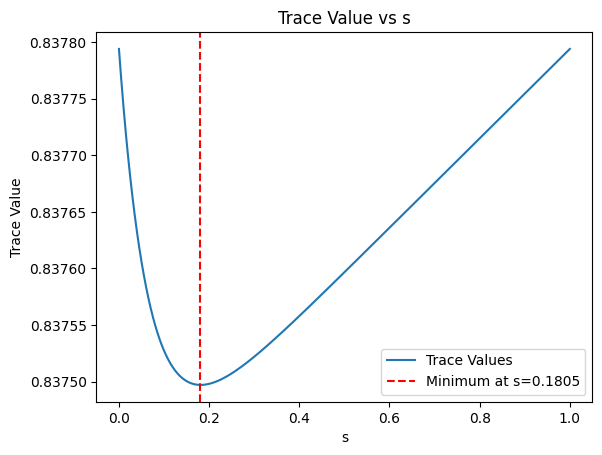

In [5]:
n=0
alpha=1.12#displacement parameter
eta=0.01
b=7
dim=10
norm=negcs(alpha,n)
print(calculate_Nbar(alpha, n))
D=displace(dim,alpha)
state=norm*(tensor(fock(dim,0),D*fock(dim,n))+tensor(D*fock(dim,n),fock(dim,0)))
rho_state=ket2dm(state)
rho_one=ptrace(bs(eta,dim)*tensor(rho_state,thermal_dm(dim,b))*bs(eta,dim).dag(),[0, 1])
rho_idler=ptrace(rho_state,1)
rho_zero=ptrace(bs(0,dim)*tensor(rho_state,thermal_dm(dim,b))*bs(0,dim).dag(),[0, 1])
print(rho_zero.dims)
print(rho_one.dims)
min_trace=min_trace_value(rho_zero, rho_one)





C:\Users\Abhimanyu\AppData\Local\Temp\ipykernel_5392\792816500.py:20: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(M_values), np.log10(Pr_e_values))


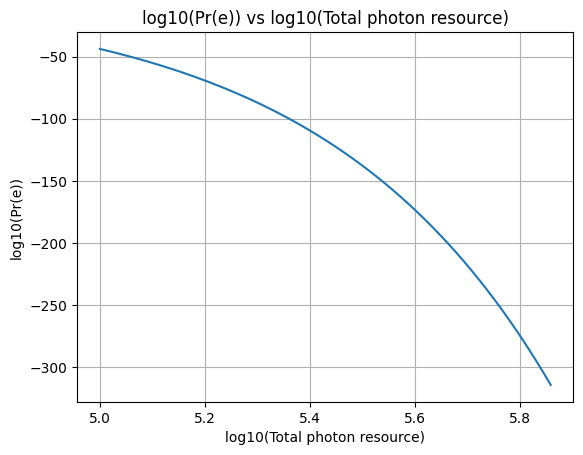

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
kappa = 0.01
Nb =7
Ns = 0.7

# Function for Pr(e)
def pr_e(M):
    return 0.5 * np.exp(-M * kappa * Ns /( Nb) )

# Range of M values (assuming M varies from 10^5 to 10^7)
M_values = np.logspace(5, 8, 200)

# Calculate Pr(e) for each M
Pr_e_values = pr_e(M_values)

# Plot log10(Pr(e)) vs log10(M)
plt.plot(np.log10(M_values), np.log10(Pr_e_values))
plt.xlabel('log10(Total photon resource)')
plt.ylabel('log10(Pr(e))')
plt.title('log10(Pr(e)) vs log10(Total photon resource)')
plt.grid(True)
plt.show()



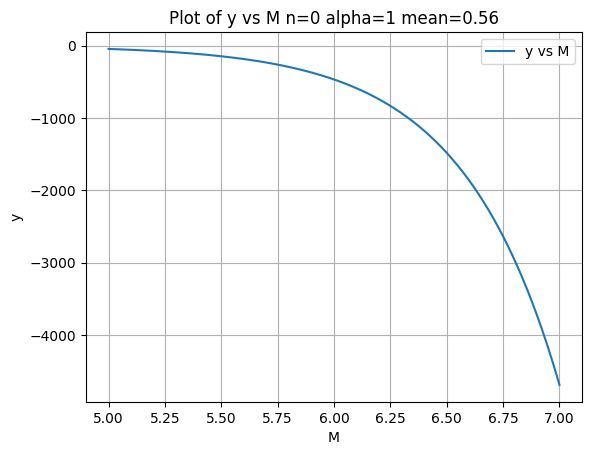

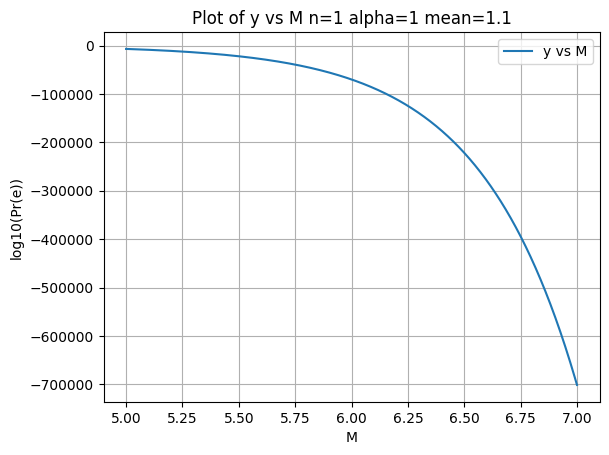

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
M = np.linspace(5, 7, 1000)
min_trace =  0.9989214028619852 

# Calculate y
y = -0.3010 + (10**M) * np.log10(min_trace)

# Plot y vs M
plt.plot(M, y, label="y vs M")
plt.xlabel("M")
plt.ylabel("y")
plt.title("Plot of y vs M n=0 alpha=1 mean=0.56")
plt.grid(True)
plt.legend()
plt.show()

M = np.linspace(5, 7, 1000)
min_trace = 0.8509476045981899

# Calculate y
y = -0.3010 + (10**M) * np.log10(min_trace)

# Plot y vs M
plt.plot(M, y, label="y vs M")
plt.xlabel("M")
plt.ylabel("log10(Pr(e))")
plt.title("Plot of y vs M n=1 alpha=1 mean=1.1")
plt.grid(True)
plt.legend()
plt.show()

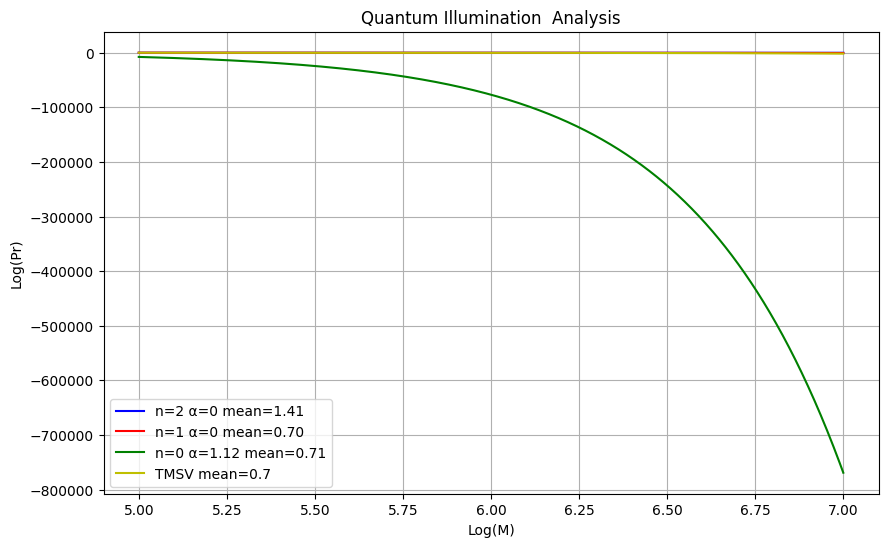

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the first plot
M1 = np.linspace(5, 7, 1000)
min_trace1 = 0.9999683738782917
y1 = -0.3010 + (10**M1) * np.log10(min_trace1)

# Define parameters for the second plot
M2 = np.linspace(5, 7, 1000)
min_trace2 = 0.9998734679922072
y2 = -0.3010 + (10**M2) * np.log10(min_trace2)

# Define parameters for the third plot
M3 = np.linspace(5, 7, 1000)
min_trace3 = 0.8376837228130304
y3 = -0.3010 + (10**M3) * np.log10(min_trace3)

# Define parameters for the fourth plot (Corrected to use M4)
M4 = np.linspace(5, 7, 1000)
min_trace4 = 0.999617811448348
y4 = -0.3010 + (10**M4) * np.log10(min_trace4)  # Changed M3 to M4

# Create a figure and axis with a specified size
plt.figure(figsize=(10, 6))

# Plot each curve with labels and distinct colors
plt.plot(M1, y1, label="n=2 α=0 mean=1.41", color='b')
plt.plot(M2, y2, label="n=1 α=0 mean=0.70", color='r')
plt.plot(M3, y3, label="n=0 α=1.12 mean=0.71", color='g')
plt.plot(M4, y4, label="TMSV mean=0.7", color='y')

# Add a legend to display the labels
plt.legend()

# Optional: Add axis labels and a title for better clarity
plt.xlabel('Log(M)')
plt.ylabel('Log(Pr)')
plt.title('Quantum Illumination  Analysis')

# Optional: Add grid lines for easier interpretation
plt.grid(True)

# Display the plot
plt.show()
